# Try k-means on the data shown in figure 1c

1. dataset - do the same sets as Scala et al.'s article. First use Yao et al.'s UMI counts, then use Scala et al.'s exon/intron counts
2. will do t-SNE representation used in figure 1c, and if possible try on common gene count representation after that
3. parameter tuning: number of clusters
4. evaluation method: adjusted rand index, normalized mutual information, homogeneity, completeness and V-measure, Fowlkes-Mallows

In [1]:
import pickle
from collections import namedtuple
import numpy as np
import os.path
from preprocess_figdata import preprocess_figure_data
from sklearn.cluster import KMeans
import pylab as plt
import seaborn as sns; sns.set()
import matplotlib
from plot_fig1c import plot_sidebyside,plot_fig1c

In [2]:
# load Yao et al.'s dataset for the Vip/Lamp5 cells
m1data = pickle.load(open('../data/processed/reduced-allen-data/10X_cells_v2_AIBS.pickle', 'rb'))["viplamp"]

# load the study results of Scala et al.
houstonData = namedtuple('houstonData', 'exonCounts intronCounts cells genes layers cre yields traced \
                                         depth thickness ephys ephysNames exclude \
                                         mice_ages mice_cres morphometrics morphometricsNames zProfiles \
                                         exonLengths intronLengths')
m1 = pickle.load(open('../data/processed/rnaseq/m1.pickle', 'rb'))

#load transcriptomic type assignment from Scala et al.
ttypes = pickle.load(open('../data/processed/rnaseq/ttypes.pickle', 'rb'))
subset = np.isin(ttypes['family'], ['Lamp5', 'Vip']) #mask to get vip/lamp5 cell info from m1

# load t-SNE representations of Yao et al.'s Vip/Lamp5 cells
Z = pickle.load(open('../data/processed/rnaseq/10x-tsne-viplamp.pickle', 'rb')) 

In [3]:
# if the datasets are not preprocessed and put into pickle files yet, do it now
UMIcnt_path = "../data/clustering_datasets/viplamp_umi.pickle"
exintex_path = "../data/clustering_datasets/viplamp_exint.pickle"

if (os.path.isfile(UMIcnt_path)==False) and (os.path.isfile(exintex_path)==False):
    preprocess_figure_data(m1data['counts'], m1data['genes'], m1.exonCounts[subset,:], m1.intronCounts[subset,:], 
                    m1.genes, m1.exonLengths, m1.intronLengths, UMI_fname=UMIcnt_path, 
                    exint_fname=exintex_path)

In [4]:
test_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(Z)

In [5]:
def plot_sidebyside1(clusters, Z, m1data, title, reftitle="", figsize=(5,2)):
    """
    This function plots figure 1c  from Scala et al. with new cluster assignments
    and the original version side by side
    
    Arguments:
    - clusters: new cluster assignments
    - Z: the t-SNE representations from Scala et al.
    - m1data: Yao et al.'s dataset for the subroup "viplamp"
    - title: title for the new cluster assignments
    - reftitle: if you want anything other than "Fig1c from Scala et al." for the
                    original, set it here
    - figsize: a tuple of figure size to be given to pylab.figsize
    """
    
    plt.figsize = plt.figure(figsize=figsize)
    
    # plot left without ticks or borderline
    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.scatter(Z[:, 0], Z[:, 1], c=clusters,s=0.5)
    sns.despine(left=True, bottom=True)
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    if reftitle =="":
        plot_fig1c(Z, m1data)
    else:
        plot_fig1c(Z, m1data, reftitle)

NameError: name 'plot_fig1c' is not defined

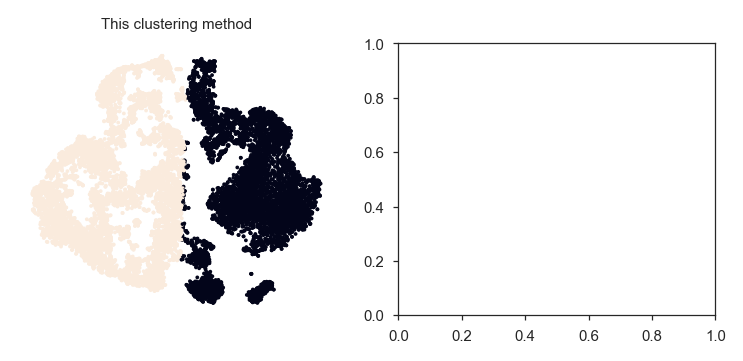

In [6]:
plt.figsize = plt.figure(figsize=(5, 2))

#these remove ticks from the plot and erases borderline of plot
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.scatter(Z[:, 0], Z[:, 1], c=test_kmeans,s=0.5)
sns.despine(left=True, bottom=True)
plt.title("This clustering method")

plt.subplot(1, 2, 2)
plot_fig1c(Z, m1data)

NameError: name 'plot_fig1c' is not defined

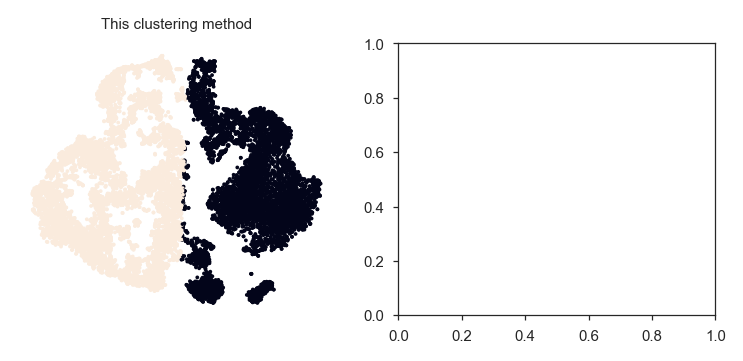

In [7]:
plot_sidebyside1(test_kmeans, Z, m1data, title="This clustering method")

In [ ]:
plot_sidebyside(test_kmeans, Z, m1data, title="This clustering method")